In [272]:
import networkx as nx
import osmnx as ox
from matplotlib.collections import LineCollection

ox.config(log_console=True, use_cache=True)


In [273]:
place = 'Piedmont, California, USA'
G = ox.graph_from_place(place, network_type='drive_service')
G = ox.project_graph(G)

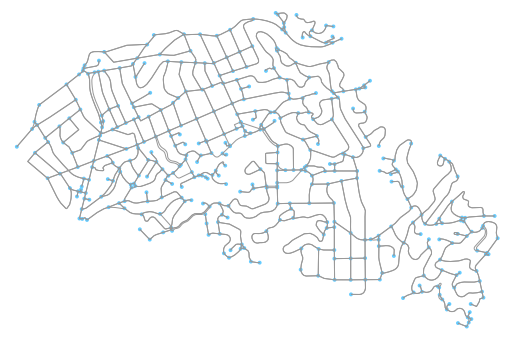

In [274]:
fig, ax = ox.plot_graph(G)

In [275]:
source_node = G[53124805]
destination_node = G[5477879797]



class Node:
    def __init__(self, node, osmid, distance = 0, parent = None):
        self.node = node
        self.distance = distance
        self.parent = parent
        self.osmid = osmid
    
    def expand(self):
        children = []
        for child in self.node:
            children.append(Node(G[child], child, distance = self.node[child][0]['length'], parent = self))
        return children
    
    def path(self):
        node = self
        path = []
        while node:
            path.append(node)
            node = node.parent
        return path[::-1]

origin = Node(source_node, 53124805, distance = 0, parent = None)

children = origin.expand()


nextgeneration = children[0].expand()

for node in nextgeneration[0].path():
    print(node.osmid)



53124805
53124807
53092201


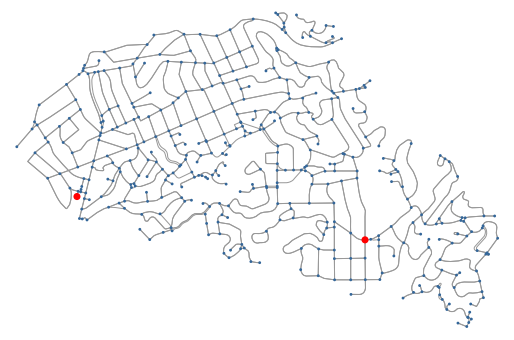

(<Figure size 645.26x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5257302eb8>)

In [285]:

ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)



In [278]:
len(node_Ys)

408

In [279]:
len(node_Xs)

408

In [280]:
node_Xs = [float(x) for _, x in G.nodes(data='x')]
node_Ys = [float(y) for _, y in G.nodes(data='y')]
edges = ox.graph_to_gdfs(G, nodes=False, fill_edge_geometry=True)
west, south, east, north = edges.total_bounds

In [281]:
bbox_aspect_ratio = (north-south)/(east-west)

In [282]:
fig_height = 6

In [283]:
fig_width = fig_height / bbox_aspect_ratio

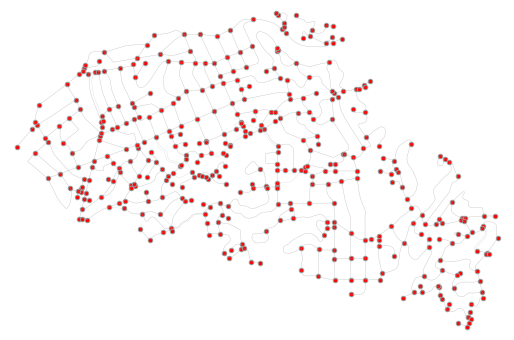

In [284]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height), facecolor='w')
ax.set_facecolor('w')
lines = []
for u, v, data in G.edges(keys=False, data=True):
        if 'geometry' in data:
            xs, ys = data['geometry'].xy
            lines.append(list(zip(xs, ys)))
        else:
            x1 = G.nodes[u]['x']
            y1 = G.nodes[u]['y']
            x2 = G.nodes[v]['x']
            y2 = G.nodes[v]['y']
            line = [(x1, y1), (x2, y2)]
            lines.append(line)
lc = LineCollection(lines, colors='#999999', linewidths=0.3, alpha=0.4, zorder=2)
ax.add_collection(lc)
ax.scatter(node_Xs, node_Ys, s=20, c=['r'], alpha=1, edgecolor='#999999', zorder=1)
margin = 0.02
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
xaxis = ax.get_xaxis()
yaxis = ax.get_yaxis()

xaxis.get_major_formatter().set_useOffset(False)
yaxis.get_major_formatter().set_useOffset(False)
ax.axis('off')
ax.margins(0)
ax.tick_params(which='both', direction='in')
xaxis.set_visible(False)
yaxis.set_visible(False)
plt.show()